## Runtime Duration of UAT data
Analytics on Runtime data of the UAT reports.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display

# prep the environment
data_dir = Path.cwd() / "data"
data_file = data_dir / "uat_data.pkl"

%matplotlib inline


In [13]:
# load the UAT runtime data
if data_file.exists():
    uat_df = pd.read_pickle(data_file)
    print(f"Found {len(uat_df)} records.")
else:
    print(f"Processed data file missing ({data_file}), please run the Data Prep notebook first.")
    exit(-1)

# create time based DataFrame
time_df = uat_df.set_index('StartTime')


Found 1888 records.


### Overview


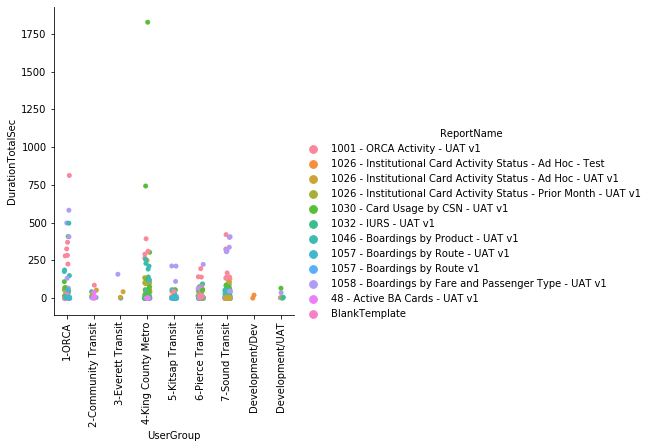

In [14]:
sns.catplot(x='ReportGroup', y='DurationTotalSec', hue='ReportName', data=time_df)
plt.xticks(rotation=90)
plt.show()


### Runtime Split

What proportion of the total runtime is spent Retrieving, Rendering, and Processing the reports.


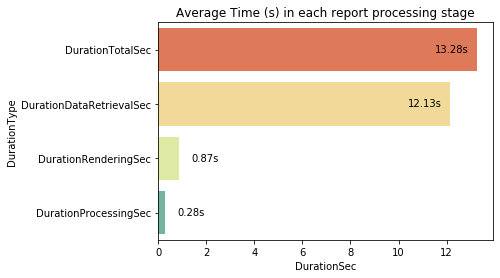

In [31]:
time_cols = ['DurationTotalSec', 'DurationDataRetrievalSec', 'DurationRenderingSec', 'DurationProcessingSec']
time_duration_df = time_df.melt(['User', 'ResultStatus', 'ReportName'], var_name='DurationType', value_name='DurationSec', value_vars=time_cols)
fig, ax = plt.subplots()    
sns.barplot(x='DurationSec', y='DurationType', data=time_duration_df, palette='Spectral', ci=None)
for i, tcol in enumerate(time_cols):
    val = time_duration_df[time_duration_df['DurationType'] == tcol]['DurationSec'].mean()
    if val > 5:
        offset = val - 1.75
    else:
        offset = val + .5
    ax.text(offset, i + 0.05, f"{val:.2f}s")
plt.title('Average Time (s) in each report processing stage')
plt.show()